In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Data


In [44]:
housing = pd.read_csv('housing.csv')

In [45]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

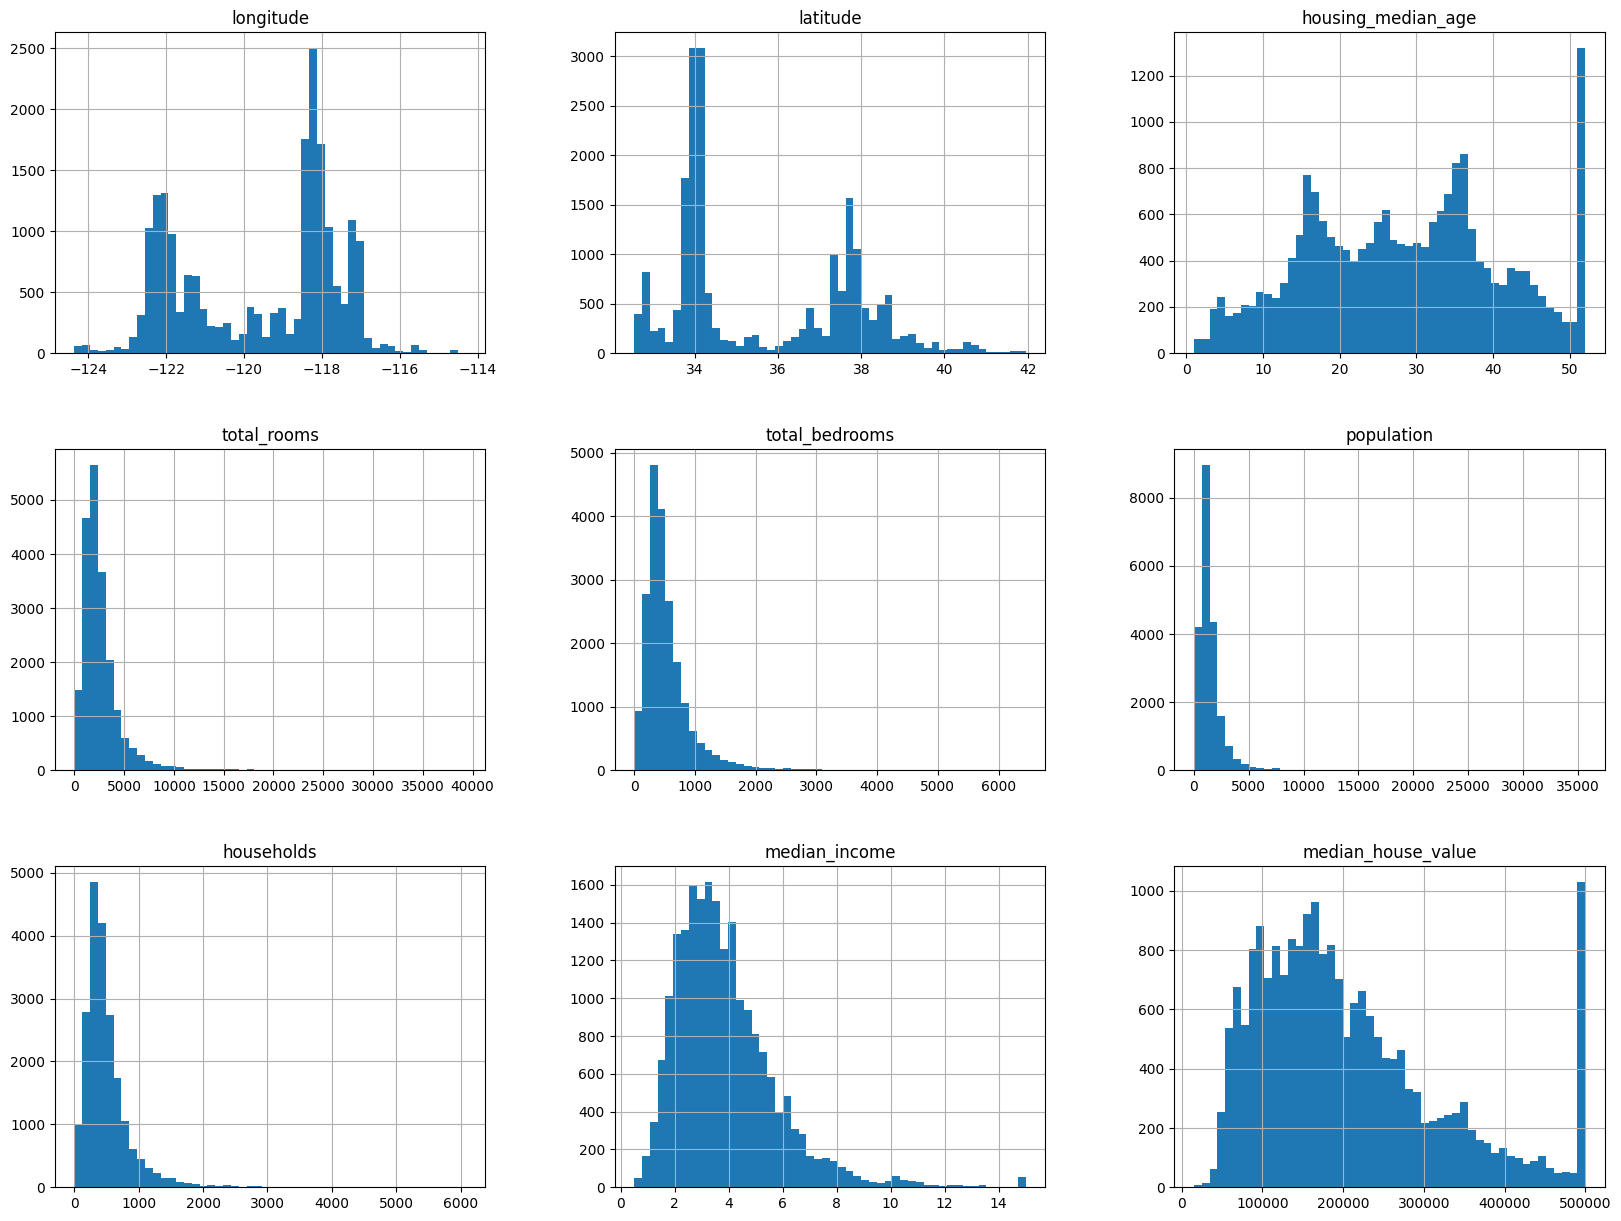

In [46]:
housing.hist(bins=50, figsize=(20,15))

<Axes: xlabel='latitude', ylabel='longitude'>

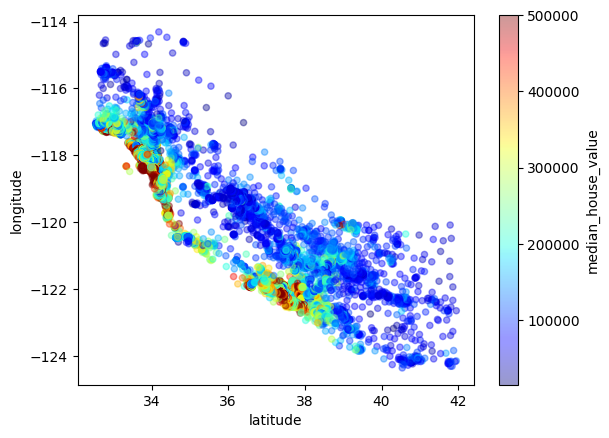

In [47]:
housing.plot(kind='scatter', x='latitude', y='longitude', alpha=0.4, c='median_house_value', cmap='jet', colorbar=True)

In [48]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [49]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [50]:
housing["income_cat"].value_counts()

,count
income_cat,
3,7236
2,6581
4,3639
5,2362
1,822


In [51]:
np.random.seed(42)

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index]

# Preparing data to train model


In [53]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5


In [54]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

In [55]:
ocean_proximity_train_col = strat_train_set['ocean_proximity'].copy()
ocean_proximity_test_col = strat_test_set['ocean_proximity'].copy()

In [56]:
strat_train_set.drop('ocean_proximity',axis=1,inplace=True)
strat_test_set.drop('ocean_proximity',axis=1,inplace=True)

In [57]:
housing = strat_train_set.copy()
testing = strat_test_set.copy()

In [58]:
housing_labels = housing['median_house_value'].copy()
testing_labels = testing['median_house_value'].copy()

In [59]:
housing.drop('median_house_value',axis=1,inplace=True)
testing.drop('median_house_value',axis=1, inplace=True)

In [60]:
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,158
population,0
households,0
median_income,0


# Handling missing values

In [61]:
from sklearn.impute import SimpleImputer

In [67]:
imputer = SimpleImputer(strategy='median')

In [68]:
housing_numeric_tr = imputer.fit_transform(housing)
housing = pd.DataFrame(housing_numeric_tr, columns=housing.columns, index=housing.index)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [70]:
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,158
population,0
households,0
median_income,0
